# 1.Pre-process the dataset.
# 2. Identify outliers.
# 3. Check the correlation.
# 4. Implement linear regression and random forest regression models
# 5. Evaluate the models and compare their respective scores like R2, RMSE,

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns

In [202]:
df = pd.read_csv("./uber.csv")

In [203]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [204]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [205]:

df.info() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


# Preprocessing

In [206]:
df =df.drop(['Unnamed: 0', 'key',  'pickup_datetime',] , axis=1)

In [207]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 9.2 MB


In [208]:
df.sample(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
159032,9.3,-73.989782,40.741297,-74.010940,40.709338,1
35358,10.9,-74.004215,40.720970,-73.981450,40.749762,3
189377,7.3,-73.954298,40.778527,-73.975482,40.755437,1
192588,18.5,-74.009247,40.706012,-73.975245,40.760260,3
70952,8.0,-73.965271,40.795231,-73.951180,40.812237,5


In [210]:


print("Checking null values")

print("getting only those column having atleast one null value")
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f'column_name = {col} , Total_null_values = ',df[col].isnull().sum())



Checking null values
getting only those column having atleast one null value
column_name = dropoff_longitude , Total_null_values =  1
column_name = dropoff_latitude , Total_null_values =  1


In [211]:

index_no = []

col = "dropoff_longitude" 

for i,j in enumerate(df[col].isnull()):
    if(j==True):
        index_no.append(i)

for i in index_no:
    df.drop(i , axis =0 , inplace = True)


In [212]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f'column_name = {col} , Total_null_values = ',df[col].isnull().sum())


In [213]:
df.duplicated().sum()



3022

In [214]:


#  Dropping duplicates

df.drop_duplicates(inplace=True)



In [215]:
df.duplicated().sum()

0

In [216]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

/home/mmcoe/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

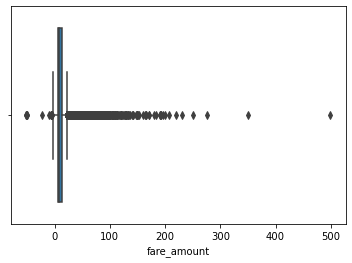

In [217]:


col = "fare_amount"

sns.boxplot(df[col])



Text(0.5, 1.0, 'Heatmap For Correlation')

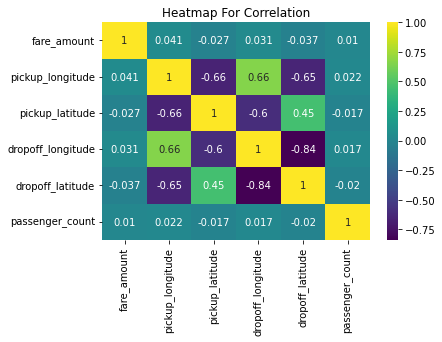

In [218]:
sns.heatmap(df.corr() , annot=True, cmap='viridis').set_title("Heatmap For Correlation") 

In [219]:
#  dropping fare amount column due to low correletion with another columns

df.drop(["fare_amount" ] , inplace= True , axis=1)

In [220]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.999817,40.738354,-73.999512,40.723217,1
1,-73.994355,40.728225,-73.994710,40.750325,1
2,-74.005043,40.740770,-73.962565,40.772647,1
3,-73.976124,40.790844,-73.965316,40.803349,3
4,-73.925023,40.744085,-73.973082,40.761247,5


Text(0.5, 1.0, 'Heatmap For Correlation')

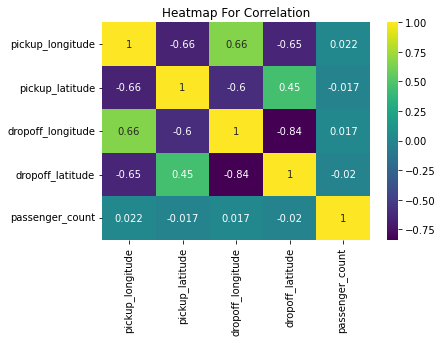

In [221]:
sns.heatmap(df.corr() , annot=True, cmap='viridis').set_title("Heatmap For Correlation") 

In [222]:
feature = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude']



Text(0.5, 1.0, 'pickup_longitude')

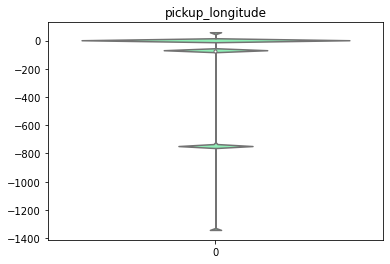

In [223]:
col = feature[0]
sns.violinplot( data=df[col],palette='rainbow').set_title(f"{col}")

Text(0.5, 1.0, 'pickup_latitude')

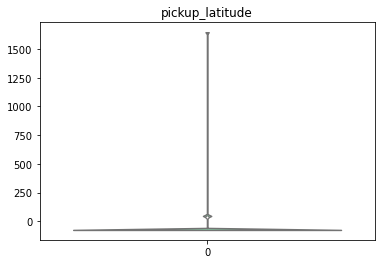

In [224]:
col = feature[1]
sns.violinplot( data=df[col],palette='rainbow').set_title(f"{col}")

Text(0.5, 1.0, 'pickup_latitude')

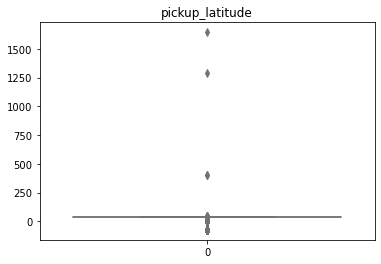

In [225]:
col = feature[1]
sns.boxplot( data=df[col],palette='rainbow').set_title(f"{col}")

Text(0.5, 1.0, 'dropoff_longitude')

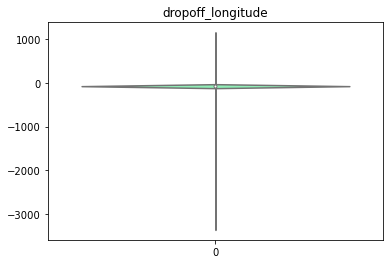

In [226]:
col = feature[2]
sns.violinplot( data=df[col],palette='rainbow').set_title(f"{col}")

Text(0.5, 1.0, 'dropoff_latitude')

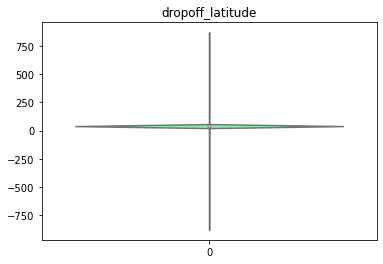

In [227]:
col = feature[3]
sns.violinplot( data=df[col],palette='rainbow').set_title(f"{col}")

In [229]:
#  outlier detected in 'pickup_latitude'



# df_backup = df    

max_value = 250

col = feature[1]
maxi = np.where(df[col] > max_value )
maxi =list(maxi[0])

print("total outliers present : ",len(maxi))




total outliers present :  4


In [230]:
df.drop(maxi, axis =0 , inplace = True) 

In [231]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.999817,40.738354,-73.999512,40.723217,1
1,-73.994355,40.728225,-73.994710,40.750325,1
2,-74.005043,40.740770,-73.962565,40.772647,1
3,-73.976124,40.790844,-73.965316,40.803349,3
4,-73.925023,40.744085,-73.973082,40.761247,5


In [232]:

target_col_name = "passenger_count"

X = df.drop(target_col_name,axis=1)

y= df[target_col_name]

# Test Train Split

In [235]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

print(f" X_train shape = {X_train.shape}")
print(f" X_test shape = {X_test.shape}")



 X_train shape = (157578, 4)
 X_test shape = (39395, 4)


# Scaling

In [236]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

sc.fit_transform(X_train)

array([[-0.0474059 ,  0.03731552, -0.03517132,  0.04423773],
       [-0.05139236,  0.0306178 , -0.03525161,  0.03959489],
       [-0.04843713,  0.03371583, -0.03144088,  0.05509573],
       ...,
       [-0.04456979,  0.03425152, -0.03334821,  0.04552808],
       [-0.04783355,  0.02871478, -0.01912711,  0.03742179],
       [-0.04622987,  0.03118018, -0.03342841,  0.03915677]])

# Linear Regression

In [237]:
#  using linear regression 

from sklearn.linear_model import LinearRegression

lr = LinearRegression()



In [238]:
lr.fit(X_train , y_train)

LinearRegression()

In [239]:
X_test =sc.transform(X_test)

In [240]:

lr.score(X_test,y_test)

-0.06152369585119066

# Random Forest Regression

In [241]:
#  using Random forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [244]:
rf.fit(X_train , y_train)

RandomForestRegressor()

In [245]:
rf.score(X_test,y_test)

-0.18944017463096197